In [1]:
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the folder path inside Google Drive
drive_folder = "/content/drive/My Drive/scripts"

# Append it to sys.path to allow importing modules
sys.path.append(os.path.abspath(drive_folder))




In [4]:
from ARIMA import Modelling
arima=Modelling()

In [5]:
import pandas as pd
brentoil_price=pd.read_csv("BrentOilPrices.csv")
brentoil_price.set_index("Date",inplace=True)

In [6]:
!pip3 install statsmodels

Test Statistics: -1.9938560113924666
p-Value: 0.2892735048934033
Lag used: 29
Number of observation: 29
Critical Values': {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
Conclusion: Non-Stationary


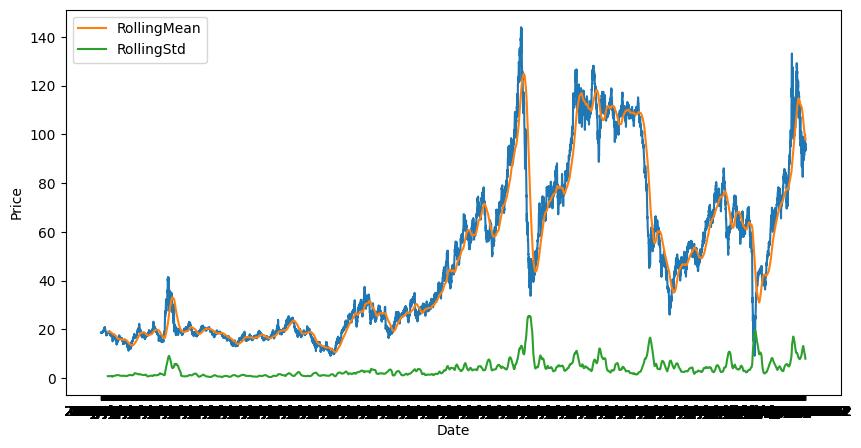

In [7]:
arima.check_stationarity(brentoil_price,'Price')

In [8]:
import numpy as np
brentoil_price['logPrice']=np.log(brentoil_price['Price'])

Test Statistics: -1.8088944145306585
p-Value: 0.3760548905105383
Lag used: 29
Number of observation: 29
Critical Values': {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
Conclusion: Non-Stationary


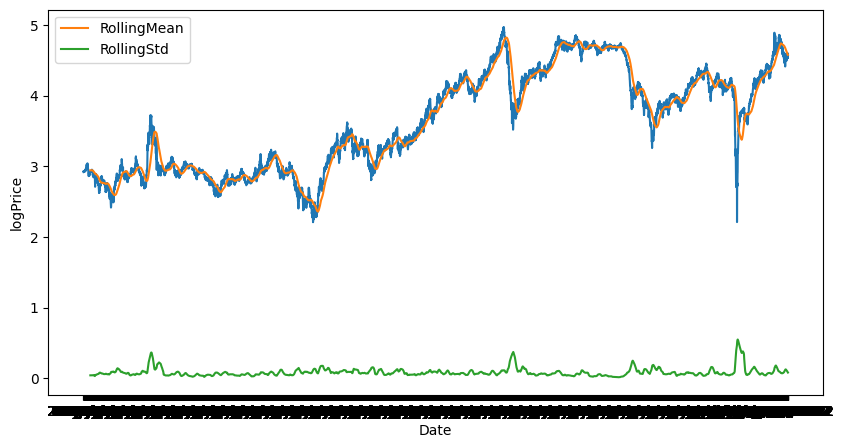

In [9]:
arima.check_stationarity(brentoil_price,'logPrice')

In [10]:
brentoil_price['diff']=brentoil_price['Price'].diff()

Test Statistics: -15.448616672762887
p-Value: 2.8033477182161e-28
Lag used: 28
Number of observation: 28
Critical Values': {'1%': -3.4310855435237153, '5%': -2.86186506202756, '10%': -2.5669430255106724}
Conclusion: Stationary


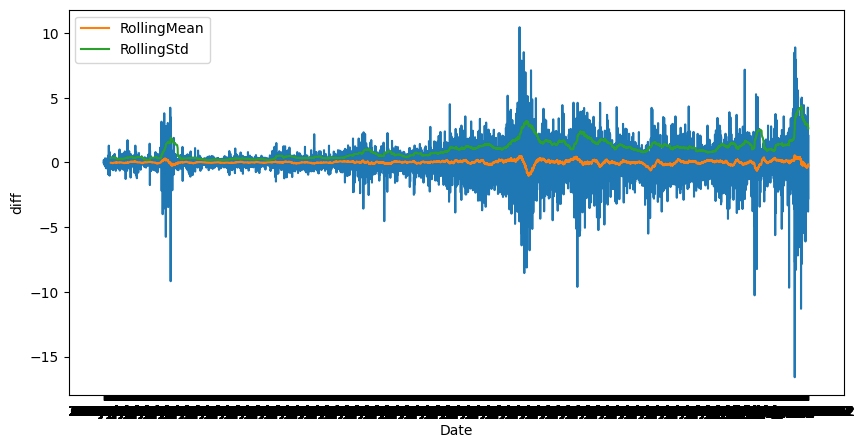

In [11]:
arima.check_stationarity(brentoil_price.dropna(),'diff')

In [12]:
brentoil_price['sqrtlogPrice']=np.sqrt(brentoil_price['logPrice'])

In [13]:
train_df,test_df=arima.trai_test_split(brentoil_price)

In [14]:
y_true,y_pred,actual_vs_prediction=arima.train_arima_model(train_df,test_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
arima.evaluate_arima_model(y_true,y_pred)

Mean Absolute Error (MAE): 52.09192940595526
Mean Squared Error (MSE): 3394.3852274602373
Root Mean Squared Error (RMSE): 58.26135277746507
R Square Score (r2_score): -3.968149507116843
Mean Absolute Percentage Error (MAPE): 98.01071091138655 %


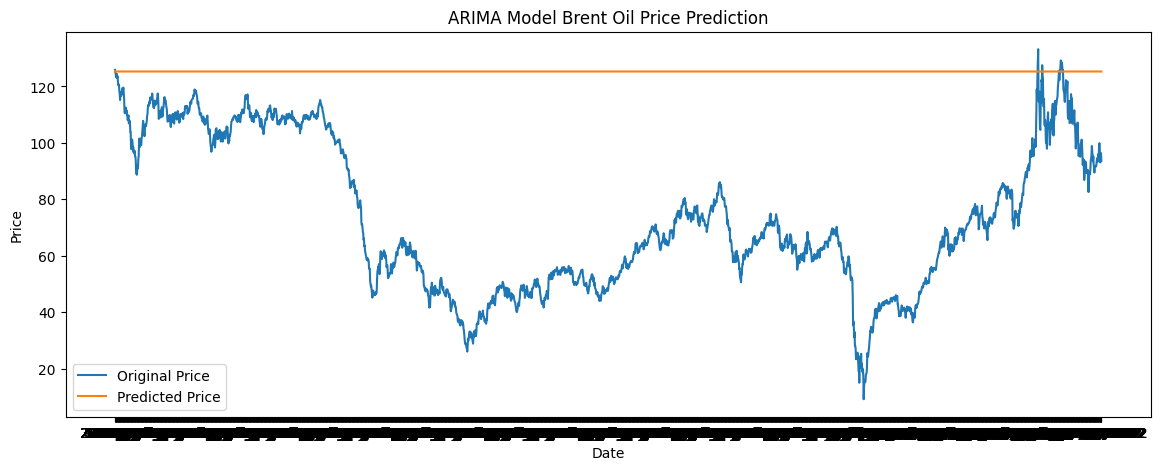

In [16]:
arima.plot_result(actual_vs_prediction)